# **Image Classification: Cats vs Dogs Dataset**

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

from tqdm import tqdm
from torch.utils.data import DataLoader

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [21]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),
                                #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                     ])

In [22]:
Batch_Size = 16
output_dir = "/Users/zerenshen/Desktop/Followb1ind1y/PytorchModular/Dataset/DogvsCat"
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(output_dir, x),transform = transform) for x in ['train', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=Batch_Size,shuffle=True, 
                                              drop_last=True) for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}
class_names = image_datasets['train'].classes 

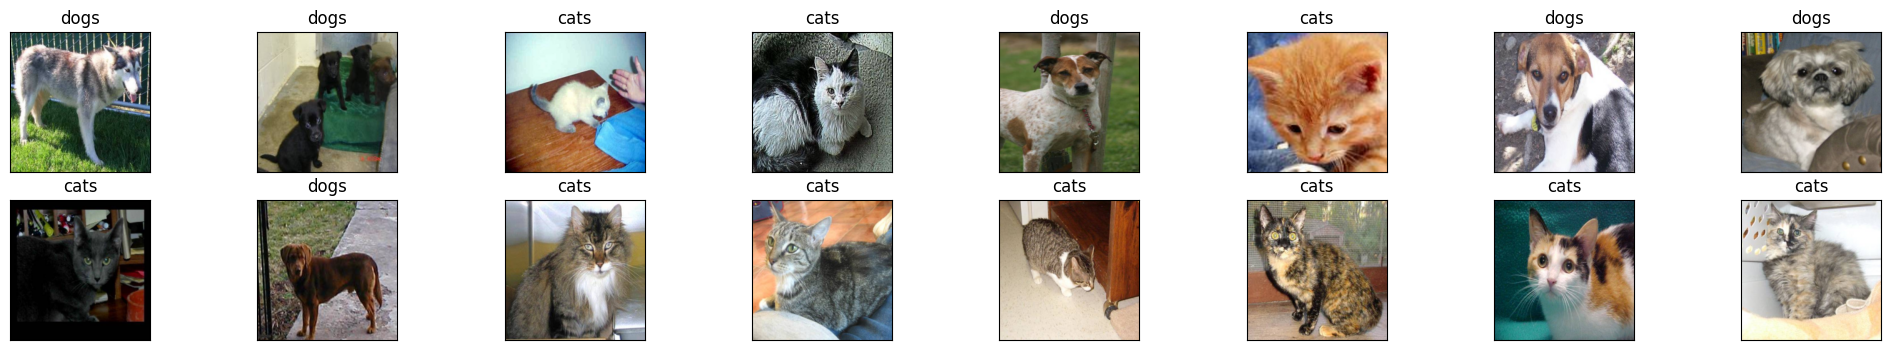

In [23]:

# Visualize some sample data from the original dataset

images, labels = next(iter(dataloaders['test']))
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 8, idx+1, xticks=[], yticks=[])
    plt.imshow((np.transpose(images[idx], (1, 2, 0))))
    ax.set_title(class_names[labels[idx]])